# Analysis for San Francisco Bay Ford GoBike Service 2017
## by Muhammad Adipurna Kusumawardana

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
https://www.lyft.com/bikes/bay-wheels/system-data

The Data
Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import re 
import glob
import zipfile
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
# Make a list containing all the zip-file names
zip_list = glob.glob('./data/*.zip')

In [3]:
# Extract all zipfile using zipfile library
for zip_file in zip_list:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall("./data/")

In [4]:
csv_list = glob.glob('./data/*.csv') 

['./data\\2017-fordgobike-tripdata.csv',
 './data\\201801-fordgobike-tripdata.csv',
 './data\\201802-fordgobike-tripdata.csv',
 './data\\201803-fordgobike-tripdata.csv',
 './data\\201804-fordgobike-tripdata.csv',
 './data\\201805-fordgobike-tripdata.csv',
 './data\\201806-fordgobike-tripdata.csv',
 './data\\201807-fordgobike-tripdata.csv',
 './data\\201808-fordgobike-tripdata.csv',
 './data\\201809-fordgobike-tripdata.csv',
 './data\\201810-fordgobike-tripdata.csv',
 './data\\201811-fordgobike-tripdata.csv',
 './data\\201812-fordgobike-tripdata.csv',
 './data\\201901-fordgobike-tripdata.csv',
 './data\\201902-fordgobike-tripdata.csv',
 './data\\201903-fordgobike-tripdata.csv',
 './data\\201904-fordgobike-tripdata.csv',
 './data\\201905-baywheels-tripdata.csv',
 './data\\201906-baywheels-tripdata.csv',
 './data\\201907-baywheels-tripdata.csv',
 './data\\201908-baywheels-tripdata.csv',
 './data\\201909-baywheels-tripdata.csv',
 './data\\201910-baywheels-tripdata.csv',
 './data\\201911-ba

In [3]:
df_2017 = pd.read_csv('./data/2017-fordgobike-tripdata.csv')
df_2017

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber


In [4]:
# Check column dtype for each column
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
# Check null value for each column
df_2017.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [6]:
# Check duplicated row
df_2017.duplicated().sum()

0

### Data Assesment Result

#### Quality Issues

* `start_time` and `end_time` columns in object dtype
* `start_station_id` and `end_station_id` columns in int64 dtype
* `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, and `end_station_longitude` columns in float64 dtype
* `bike_id` column in int64 dtype
* `user_type` in object dtype

## Data Cleaning

The programmatic data cleaning process:

* Define
* Code
* Test

What we will do for this dataframe is change columns dtype properly based on it's value.  
As always, we need to copy our dataframe before do any cleaning process, so we can refer back to the old ones.

In [7]:
# Define: Make a new copy before doing any operation, so we can refer back to the old ones.
df_2017_clean = df_2017.copy()

In [8]:
# Define: Change columns dtype based on it's value

# Code
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'start_station_id': 'object',
        'end_station_id': 'object',
        
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',
        
        'bike_id': 'object',
        'user_type': 'category'}

df_2017_clean = df_2017_clean.astype(dtype)

# Test
df_2017_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  object        
 6   start_station_longitude  519700 non-null  object        
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  object        
 10  end_station_longitude    519700 non-null  object        
 11  bike_id                  519700 non-null  object        
 12  user_type       

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [9]:
df_2017_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.7764,-122.426,43,San Francisco Public Library (Grove St at Hyde...,37.7788,-122.416,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.7849,-122.401,96,Dolores St at 15th St,37.7662,-122.427,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.8703,-122.268,245,Downtown Berkeley BART,37.8703,-122.268,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.7745,-122.409,5,Powell St BART Station (Market St at 5th St),37.7839,-122.408,2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.8688,-122.259,247,Fulton St at Bancroft Way,37.8678,-122.266,3167,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.528,2017-06-28 10:08:10.438,81,Berry St at 4th St,37.7759,-122.393,45,5th St at Howard St,37.7818,-122.405,400,Subscriber
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.7787,-122.393,321,5th at Folsom,37.7801,-122.403,316,Subscriber
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.7896,-122.401,48,2nd St at S Park St,37.7824,-122.393,240,Subscriber
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.7766,-122.417,59,S Van Ness Ave at Market St,37.7748,-122.419,669,Subscriber


### What is the structure of your dataset?

> The 2017 dataset consists of 519700 rows × 13 columns. In the other words, this dataset has 519700 observations and 13 variables.

### What is/are the main feature(s) of interest in your dataset?

> The main  features of interest in this dataset is `duration_sec`, `start_time`, and `user_type` column.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> From the main feature above, I thinks the feature that will help our investigation are station name / location, and user type. Also, we can extract month, day, and hour feature from `start_time` for further analysis.

## Exploratory Data Analysis

In [41]:
df_2017_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'month', 'start_day', 'hour', 'date'],
      dtype='object')

In [10]:
df_2017_clean.describe()

,duration_sec
count,519700.000000
mean,1099.009521
std,3444.146451
min,61.000000
25%,382.000000
50%,596.000000
75%,938.000000
max,86369.000000


In [11]:
df_2017_clean.groupby('user_type').describe()

duration_sec                                                 \
                  count         mean          std   min    25%     50%   
user_type                                                                
Customer       110470.0  2557.445786  6355.311637  61.0  667.0  1086.0   
Subscriber     409230.0   705.310490  1852.582653  61.0  350.0   529.0   

                             
               75%      max  
user_type                    
Customer    1754.0  86369.0  
Subscriber   782.0  86075.0

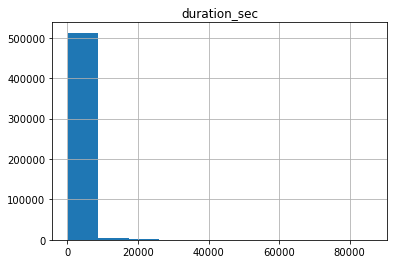

In [12]:
df_2017_clean.hist();

> Since the numeric data is only at duration column, the plotted histogram just one.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Number of bicycle service users

In [13]:
# There is ony two type of user

df_2017_clean.user_type.unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

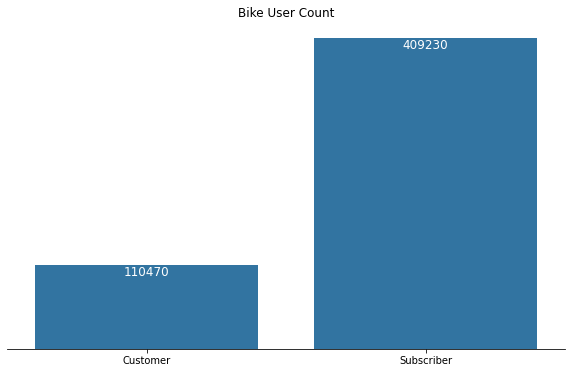

In [14]:
# Show number of user using countplot

plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=df_2017_clean, x ='user_type', color=base_color)

# add annotations
n_points = df_2017_clean.shape[0]
cat_counts = df_2017_clean['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=12)

plt.title('Bike User Count')

# Remove unnecessary features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Show the plot
plt.show();

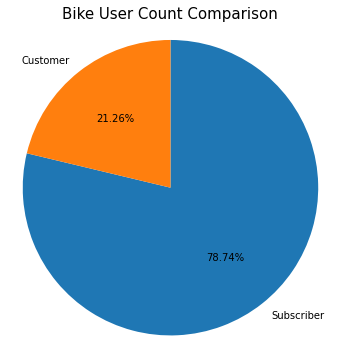

In [15]:
# Show user type by it's percentage

plt.figure(figsize=(10,6))
sorted_counts = df_2017_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);

> From the total entry of 519700 row in 2017 data, more than three-quarter users is Subscribers.

### Average trip durations

In [16]:
# Overall trip duration average

df_2017_clean.duration_sec.describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

> Overall trip duration average is 1099.009521 seconds or is about 18 minutes. Probably the outliers is due to users who forgot.

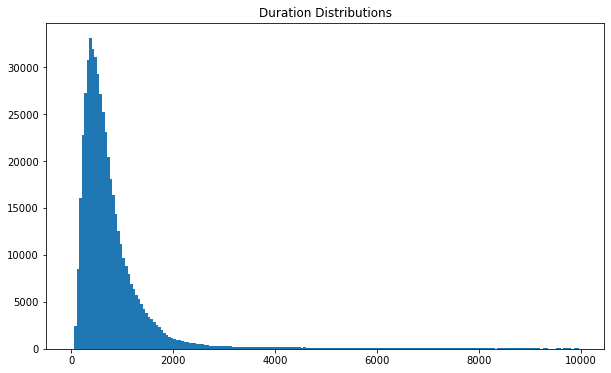

In [52]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

plt.hist(df_2017_clean.duration_sec, bins=bins)
plt.title('Duration Distributions');

> This distribution of duration is right skewed.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Datetime exploration

In [18]:
# Make new columns for analysis (month, start_day, end_day, and hour)

df_2017_clean['month'] = df_2017_clean['start_time'].dt.month_name()
df_2017_clean['start_day'] = df_2017_clean['start_time'].dt.day_name()
df_2017_clean['hour'] = df_2017_clean['start_time'].dt.hour

df_2017_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,start_day,hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.7764,-122.426,43,San Francisco Public Library (Grove St at Hyde...,37.7788,-122.416,96,Customer,December,Sunday,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.7849,-122.401,96,Dolores St at 15th St,37.7662,-122.427,88,Customer,December,Sunday,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.8703,-122.268,245,Downtown Berkeley BART,37.8703,-122.268,1094,Customer,December,Sunday,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.7745,-122.409,5,Powell St BART Station (Market St at 5th St),37.7839,-122.408,2831,Customer,December,Sunday,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.8688,-122.259,247,Fulton St at Bancroft Way,37.8678,-122.266,3167,Subscriber,December,Sunday,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.528,2017-06-28 10:08:10.438,81,Berry St at 4th St,37.7759,-122.393,45,5th St at Howard St,37.7818,-122.405,400,Subscriber,June,Wednesday,10
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.7787,-122.393,321,5th at Folsom,37.7801,-122.403,316,Subscriber,June,Wednesday,9
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.7896,-122.401,48,2nd St at S Park St,37.7824,-122.393,240,Subscriber,June,Wednesday,9
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.7766,-122.417,59,S Van Ness Ave at Market St,37.7748,-122.419,669,Subscriber,June,Wednesday,9


#### Based on month

In [19]:
df_2017_clean.month.value_counts()

October      108937
September     98558
November      95612
December      86539
August        83292
July          44073
June           2689
Name: month, dtype: int64

In [20]:
# Make new column to extract it's date only
df_2017_clean['date'] = df_2017_clean['start_time'].dt.date

june = df_2017_clean['month'] == 'June'
df_2017_clean[june]['date'].value_counts()

2017-06-30    1038
2017-06-29    1019
2017-06-28     632
Name: date, dtype: int64

> This dataset is started from June 2017. From the [Wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels), the Ford GoBike is launched at June 28, 2017. So there is no entry data before that date.

Next, we will remove the June entry. Hence, analysis will be carried out for the following months.

In [21]:
# Define: We will delete the June entry

# Code
df_2017_clean = df_2017_clean[df_2017_clean.month != 'June']

# Test
df_2017_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,start_day,hour,date
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.7764,-122.426,43,San Francisco Public Library (Grove St at Hyde...,37.7788,-122.416,96,Customer,December,Sunday,16,2017-12-31
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.7849,-122.401,96,Dolores St at 15th St,37.7662,-122.427,88,Customer,December,Sunday,15,2017-12-31
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.8703,-122.268,245,Downtown Berkeley BART,37.8703,-122.268,1094,Customer,December,Sunday,22,2017-12-31
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.7745,-122.409,5,Powell St BART Station (Market St at 5th St),37.7839,-122.408,2831,Customer,December,Sunday,17,2017-12-31
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.8688,-122.259,247,Fulton St at Bancroft Way,37.8678,-122.266,3167,Subscriber,December,Sunday,14,2017-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517006,796,2017-07-01 02:30:42.375,2017-07-01 02:43:58.779,58,Market St at 10th St,37.7766,-122.417,59,S Van Ness Ave at Market St,37.7748,-122.419,887,Customer,July,Saturday,2,2017-07-01
517007,229,2017-07-01 02:11:07.168,2017-07-01 02:14:56.593,25,Howard St at 2nd St,37.7875,-122.397,19,Post St at Kearny St,37.789,-122.403,622,Subscriber,July,Saturday,2,2017-07-01
517008,205,2017-07-01 02:05:36.240,2017-07-01 02:09:02.044,25,Howard St at 2nd St,37.7875,-122.397,48,2nd St at S Park St,37.7824,-122.393,45,Subscriber,July,Saturday,2,2017-07-01
517009,282,2017-07-01 01:21:12.583,2017-07-01 01:25:55.307,41,Golden Gate Ave at Polk St,37.7813,-122.419,59,S Van Ness Ave at Market St,37.7748,-122.419,245,Subscriber,July,Saturday,1,2017-07-01


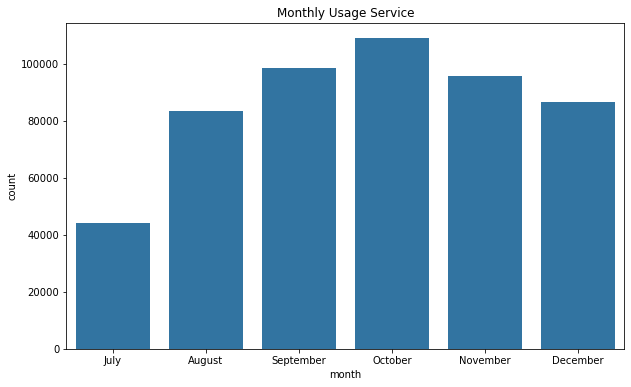

In [64]:
# Countplot bike usage based on month

month_name = ['July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10,6))
plt.title('Monthly Usage Service')
sns.countplot(data=df_2017_clean, x='month', order=month_name, color=base_color);

> From the countplot, the trend is increasing from July to October and going down in the end of the year. From [San Francisco Wikipedia](https://en.wikipedia.org/wiki/San_Francisco) page, in November and December the temperature began to decrease and the rainfall began to increase.

#### Based on weekday

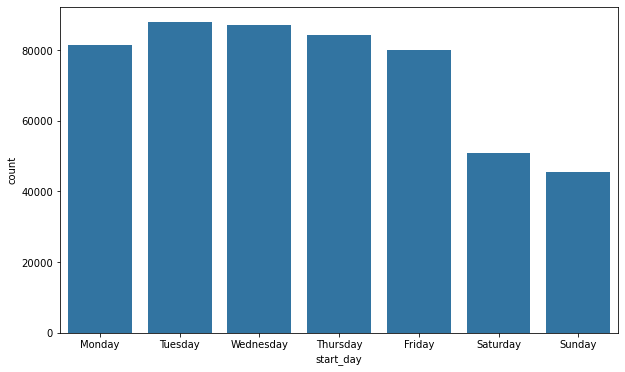

In [23]:
# Countplot bike usage based on weekday

day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,6))
plt.title('Daily Usage Service')
sns.countplot(data=df_2017_clean, x='start_day', order=day_name, color=base_color);

> This service is more widely used on weekdays than weekends. Because the majority of users are subscribers who are actively cycling on weekdays.  
> Ford GoBike was launched at the end of June, the users of this service in July were still few, then the trend continued to increase until October. Then, at the end of the year, to be precise in November, the number of users decreased. This is because at the end of the year, the weather gets colder and the rainfall increases.


On weekdays, the use of bike-sharing services is more than on weekends. We well see in the bivariate section, is this result is depend on user type or not.

#### Based on hour

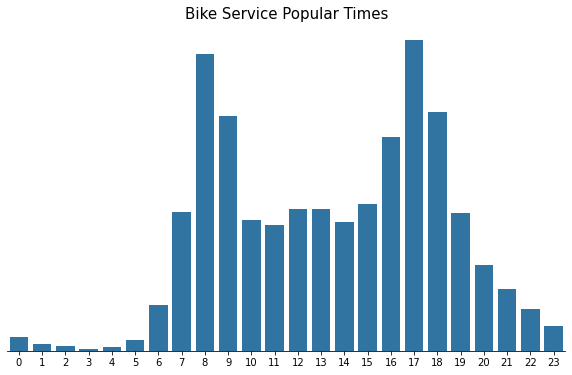

In [107]:
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sns.countplot(data=df_2017_clean, x='hour', order=hour_order, color=base_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('');

> Based on the plotting above, the use of bicycle services is the most during peak hours.

This plot can be a recommendation for tourist who want to use the Ford GoBike service if they happen to visit San Francisco and want trip around using it.

Based on datetime analysis above maybe we can get some insight in bivariate or multivariate analysis.

### Stations Analysis

station name or id, location, start vs end, distance

In [25]:
df_2017_clean.start_station_name.nunique()

272

> Based on this data, there are 272 stations across San Francisco Bay area.

In [26]:
df_2017_clean.start_station_name.unique()

array(['Laguna St at Hayes St',
       'Yerba Buena Center for the Arts (Howard St at 3rd St)',
       'Downtown Berkeley BART', '8th St at Ringold St',
       'Bancroft Way at Telegraph Ave',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Addison St at Fourth St',
       'Mechanics Monument Plaza (Market St at Bush St)',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       '3rd St at Townsend St', 'Clay St at Battery St',
       'Folsom St at 9th St', 'Cyril Magnin St at Ellis St',
       'San Salvador St at 9th St',
       'Garfield Square (25th St at Harrison St)',
       'The Embarcadero at Sansome St', 'Broadway at Kearny',
       'S Park St at 3rd St', 'California St at University Ave',
       'Frank H Ogawa Plaza', 'Dolores St at 15th St',
       'The Alameda at Bush St', '19th Street BART Station',
       'Valencia St at 16th St', 'Post St at Kearny St',
       'San Francisco City Hall (Polk St at Grove St)',
       'Church St at Duboce A

#### Ten most used stations

##### Start statiom

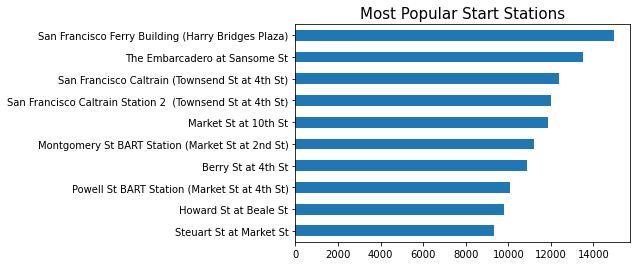

In [76]:
plt.title('Most Popular Start Stations', fontsize=15)
df_2017_clean.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

##### End station

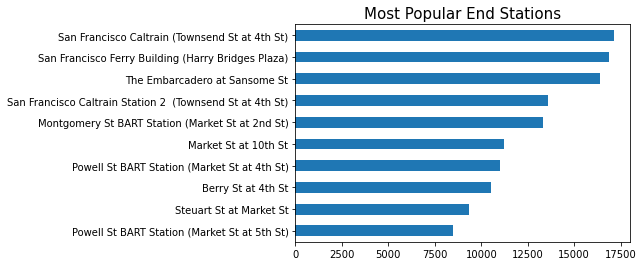

In [77]:
plt.title('Most Popular End Stations', fontsize=15)
df_2017_clean.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

##### Most Popular Station
For each start and end station, we choose ten most popular station. Then from the both, we only choose those that fall into the second category, those stations are:

In [81]:
# Make new variable for start and end stations 
pop_start = df_2017_clean.start_station_name.value_counts(ascending=True).tail(10)
pop_end = df_2017_clean.end_station_name.value_counts(ascending=True).tail(10)

# Check wheter the station is popular in both start and end 
for s in pop_start.index:
    if s in pop_end:
        print(s)

Steuart St at Market St
Powell St BART Station (Market St at 4th St)
Berry St at 4th St
Montgomery St BART Station (Market St at 2nd St)
Market St at 10th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
San Francisco Caltrain (Townsend St at 4th St)
The Embarcadero at Sansome St
San Francisco Ferry Building (Harry Bridges Plaza)


# Ten rarely used stations

##### Start station

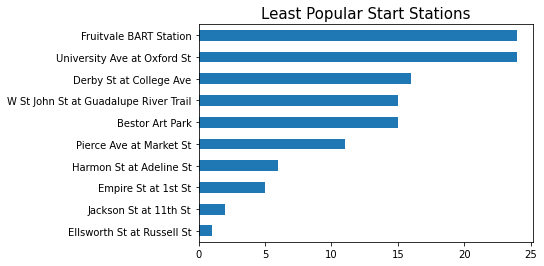

In [78]:
plt.title('Least Popular Start Stations', fontsize=15)
df_2017_clean.start_station_name.value_counts(ascending=True).head(10).plot.barh();

##### End station

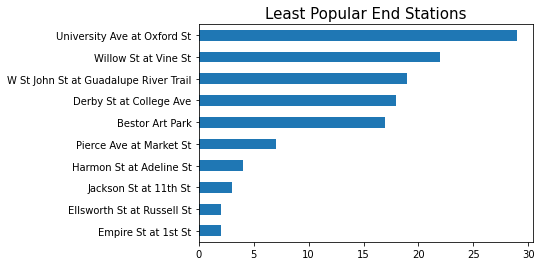

In [79]:
plt.title('Least Popular End Stations', fontsize=15)
df_2017_clean.end_station_name.value_counts(ascending=True).head(10).plot.barh();

##### Least Popular Station
For each start and end station, we choose ten least popular station. Then from the both, we only choose those that fall into the two category, those stations are:

In [82]:
# Make new variable for start and end stations 
least_start = df_2017_clean.start_station_name.value_counts(ascending=True).head(10)
least_end = df_2017_clean.end_station_name.value_counts(ascending=True).head(10).tail(10)

# Check wheter the station is least popular in both start and end 
for s in least_start.index:
    if s in least_end:
        print(s)

Ellsworth St at Russell St
Jackson St at 11th St
Empire St at 1st St
Harmon St at Adeline St
Pierce Ave at Market St
Bestor Art Park
W St John St at Guadalupe River Trail
Derby St at College Ave
University Ave at Oxford St


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, there is some problem to this Ford GoBike 2017 data, such as:
> * Quality issues for many columns, which is the dtype is not suitable with it's data
> * We have to add some column to extend our time- based analysis
> * Lastly, we have to dump data in June.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Riding duration based on user type

In [31]:
# Make filter based on user type

cust = df_2017_clean['user_type']=='Customer'
subs = df_2017_clean['user_type']=='Subscriber'

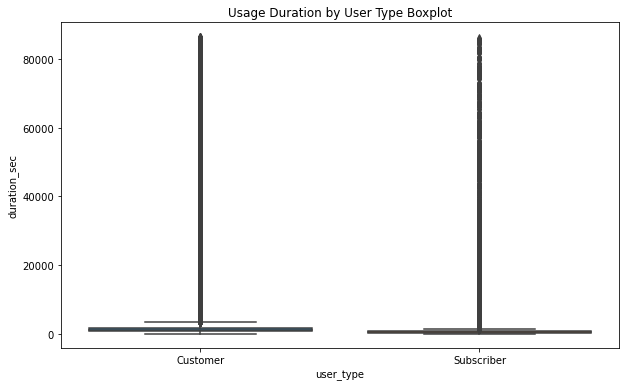

In [54]:
plt.figure(figsize=(10,6))
plt.title('Usage Duration by User Type Boxplot')
sns.boxplot(data=df_2017_clean, x='user_type', y='duration_sec');

In [33]:
# Average trip duration for Customer/Casual

df_2017_clean[cust].duration_sec.mean()

2555.3022086893293

In [34]:
# Average trip duration for Subscriber/Member

df_2017_clean[subs].duration_sec.mean()

705.5607740711711

> It seems that duration average for Customer is higher than Subscriber

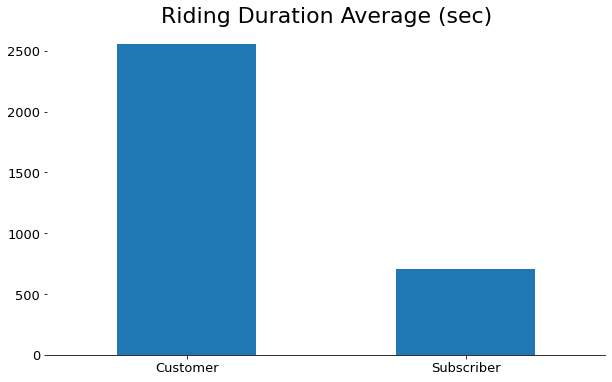

In [35]:
# Plotting trip duration comparison

df_2017_duration_user = df_2017_clean[['user_type', 'duration_sec']].groupby('user_type').mean()

ax = df_2017_duration_user.plot(kind='bar', figsize=(10,6), color=base_color, fontsize=13);

locs, labels = plt.xticks()

# # loop through each pair of locations and labels
# for loc, label in zip(locs, labels):

#     # get the text property for the label to get the correct count
#     count = cat_counts[label.get_text()]
#     pct_string = '{}'.format(count)

#     # print the annotation just below the top of the bar
#     plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w')

ax.set_title("Riding Duration Average (sec)", fontsize=22)
ax.set_ylabel("second(s)", fontsize=15)
plt.xticks(rotation=0)

# Remove unnecessary features 
ax.get_legend().remove() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Show the plot
plt.show();

#### Does the above depend on if a user is a subscriber or customer?

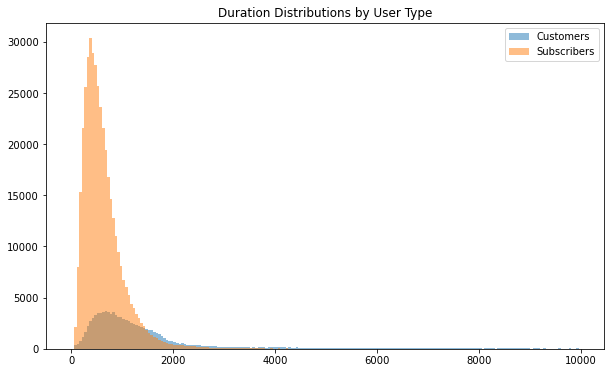

In [91]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

plt.hist(df_2017_clean[cust].duration_sec, bins, alpha=0.5, label='Customers')
plt.hist(df_2017_clean[subs].duration_sec, bins, alpha=0.5, label='Subscribers')
plt.legend(loc='upper right')
plt.title('Duration Distributions by User Type')

plt.show()

> In this histogram it can be seen that customers have a more varied duration than subscribers. The duration of use for subscribers is more narrowed to one point.

### Datetime analysis

#### Per month usage

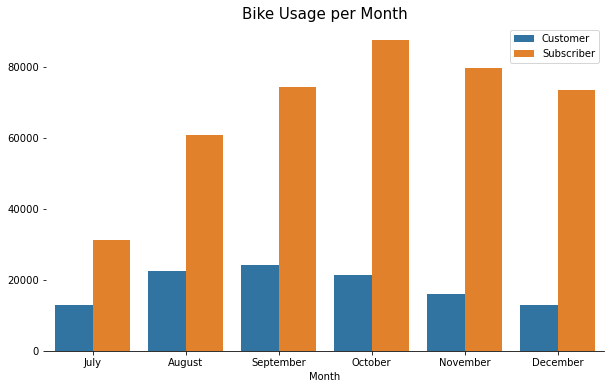

In [105]:
plt.figure(figsize=(10,6))
plt.title('Bike Usage per Month', fontsize=15)
chart = sns.countplot(data=df_2017_clean, x='month', order=month_name, hue='user_type')

chart.set(xlabel='Month', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

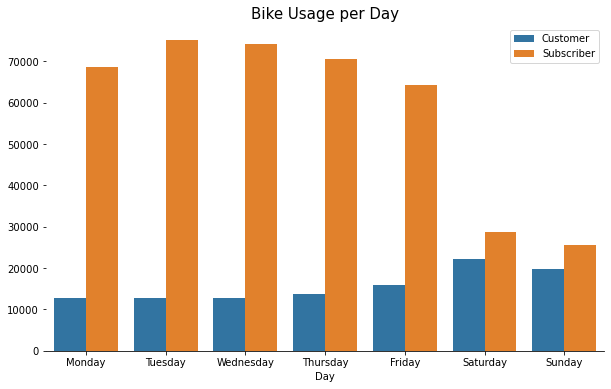

In [106]:
plt.figure(figsize=(10,6))
plt.title('Bike Usage per Day', fontsize=15)
chart = sns.countplot(data=df_2017_clean, x='start_day', order=day_name, hue='user_type')
chart.set(xlabel='Day', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

> The use of this service for Subscribers is high on weekdays and decreases on weekends.  
> In contrast to Subscribers, Customers have increased on weekends, starting from Friday and decreasing on Sundays. It is possible that the newcomers will return to their respective places that day, because Monday they have started their activities again.

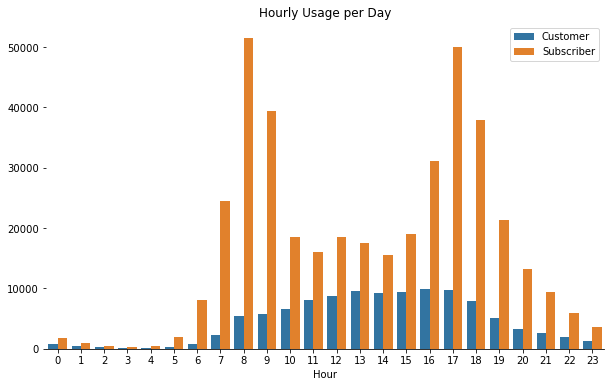

In [108]:
plt.figure(figsize=(10,6))
plt.title('Hourly Usage per Day', fontsize=15)
chart = sns.countplot(data=df_2017_clean, x='hour', hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

> * Most Subscribers use the service at peak hour.  
> * In contrast, Customers if have more flexible time, mostly at noon until afternoon.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is kind of correlation between duration and user type, Subscribers tends to have shorter usage times than Customers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * Most Subscribers use the service at peak hour.
> * In contrast, Customers if have more flexible time, mostly at noon until afternoon.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

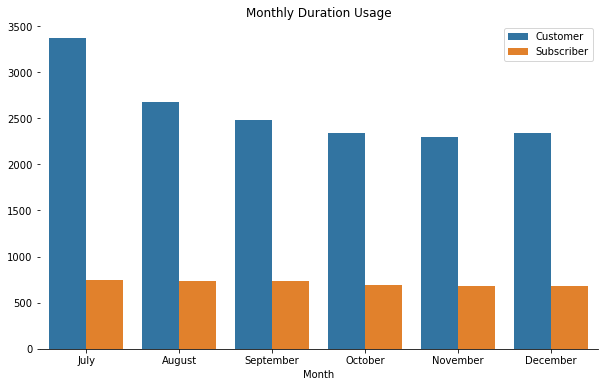

In [110]:
plt.figure(figsize=(10,6))
plt.title('Monthly Duration Usage', fontsize=15)
chart = sns.barplot(data=df_2017_clean, x='month', y='duration_sec', order=month_name, hue='user_type', ci=None)

chart.set(xlabel='Month', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

> At the beginning of this service, the Customers used this service with the longest duration than the following months. This could be due to the new service hype.  
> It is different with Subcribers, their usage duration tends to be stable since the beginning of the service opening.

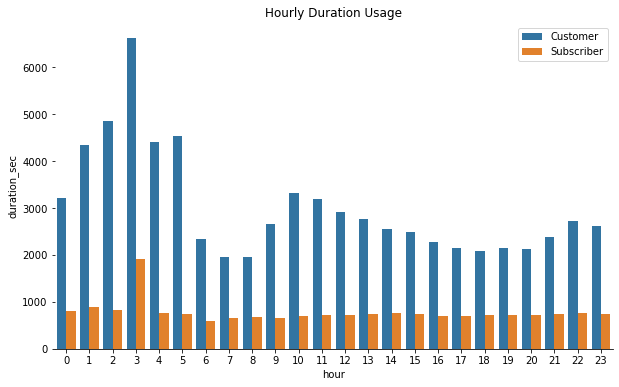

In [111]:
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
sns.barplot(data=df_2017_clean, x='hour', y='duration_sec', ci=None, hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes. The type of user has an influence on the use of this service. There are quite a lot of differences here and there, such as:
> * Duration of use
>> Subscribers tends to have stable duration usage than Customers
> * Days of use
>> Subscribers tends to use the service in weekdays, in contrast Customers have more flexible time.
> * Hours of use
>> Subscribers is have very intense usage at peak hour, Customers have more flexible time.

### Were there any interesting or surprising interactions between features?

> It's kind of surprise that average duration at 3.00 AM is most high than in other hour.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [112]:
# Export cleaned dataframe to CSV file for slide deck

# Code
df_2017_clean.to_csv('df_2017_clean.csv', index=None)
df_check = pd.read_csv('df_2017_clean.csv')

# Test
df_check

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,start_day,hour,date
0,True,False,False,True,True,True,True,True,True,True,False,True,True,True,True,True,False
1,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False
2,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False
3,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False
4,True,False,False,True,True,True,False,True,True,False,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517006,True,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,False
517007,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False
517008,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False
517009,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,False
